In [12]:
from importlib import reload ,import_module
import module.utilize as utilize
import module.multiVariant as multiVariant
import module.singleVariant as singleVariant
import numpy as np
from numba import njit,jit, float32
reload(utilize)
reload(multiVariant)
reload(singleVariant)
attribute_names=np.array(["phi_grav","particle_mass_density"])
incremental_number=100
all_ensamble_data=np.empty([0,incremental_number,64,64,64])

for name in attribute_names:
    data=utilize.readFiles(name,incremental_number)
    data=data.reshape(1,incremental_number,64,64,64)
    all_ensamble_data=np.append(all_ensamble_data,data,axis=0)

#print(all_ensamble_data.shape)
#print(all_ensamble_data[0].shape)
covBlockSize=5
dataBlockSize=5
binsNumber=128
sizeZ=20
sizeY=20
sizeX=20
minMaxBlockSize=2
isMinMax=False
copulaModel=multiVariant.multiDistCopula3D(all_ensamble_data,dataBlockSize,covBlockSize,binsNumber,[sizeZ,sizeY,sizeX],minMaxBlockSize,isMinMax)

conditions=np.array([[0,1e5],[3e10,5e10]])
copulaModel.calProbByConditionGT(conditions,sizeZ=sizeZ,sizeY=sizeY,sizeX=sizeX)
copulaModel.fit()
copulaModel.saveInfoToFile("test1")
copulaModel.saveModel("test1")
#copulaModel.calProbByCondition(conditions,sizeZ=sizeZ,sizeY=sizeY,sizeX=sizeX)
copulaModel.getNonZeroBinsCounts()

v0 non zero bins count: 55.453125
v1 non zero bins count: 21.9375


In [13]:
model=multiVariant.multiDistCopula3D.load("test1")
model.getNonZeroBinsCounts()

v0 non zero bins count: 55.453125
v1 non zero bins count: 21.9375


In [2]:
copulaModel.singleDistModels[1].reconst()
copulaModel.singleDistModels[1].reconstGT()

(1000, 2)


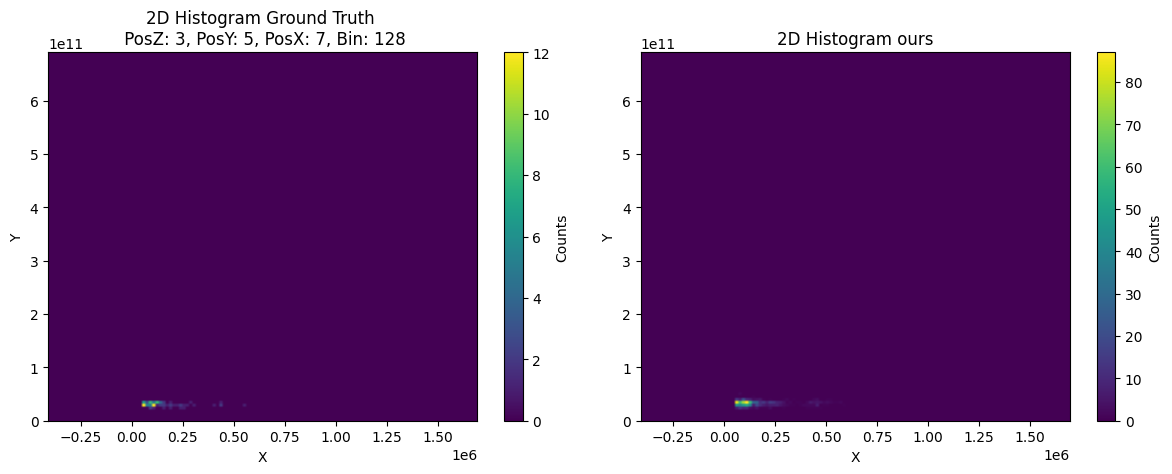

In [3]:
posZ=3
posY=5
posX=7
#copulaModel.correlationGT2D()
#copulaModel.correlation2D()
#print(copulaModel.singleDistModels[0].binEdges)
#print(copulaModel.singleDistModels[1].binEdges)
copulaModel.vis2DHistogram(posZ,posY,posX)

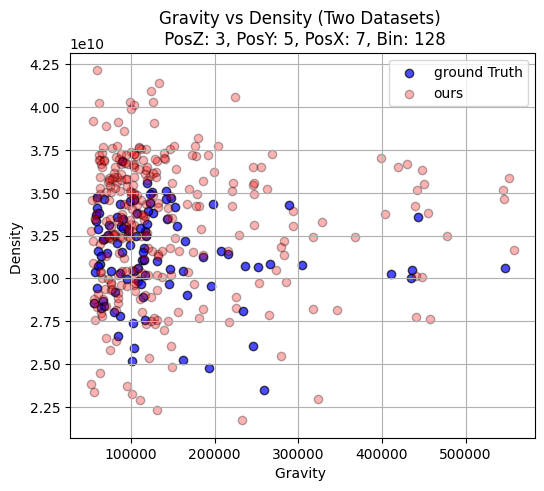

In [4]:
copulaModel.vis2DScatterplot(posZ,posY,posX,size=300)

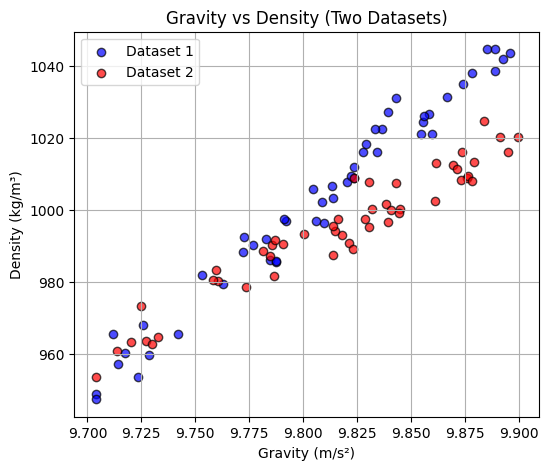

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 第一組資料
np.random.seed(0)
gravity_1 = np.random.uniform(9.7, 9.9, 50)
density_1 = 1000 + (gravity_1 - 9.8) * 500 + np.random.normal(0, 5, 50)

# 第二組資料
gravity_2 = np.random.uniform(9.7, 9.9, 50)
density_2 = 990 + (gravity_2 - 9.8) * 300 + np.random.normal(0, 5, 50)

# 畫圖
plt.figure(figsize=(6, 5))
plt.scatter(gravity_1, density_1, c='blue', alpha=0.7, edgecolors='k', label='Dataset 1')
plt.scatter(gravity_2, density_2, c='red', alpha=0.7, edgecolors='k', label='Dataset 2')

plt.xlabel("Gravity (m/s²)")
plt.ylabel("Density (kg/m³)")
plt.title("Gravity vs Density (Two Datasets)")
plt.legend()
plt.grid(True)
plt.show()